# Bank Campaign

* the problem statement 
    
    The classification goal is to predict if the client will subscribe a term deposit (variable y).
    

* Project Description
        
       - This data is related with direct marketing campaigns of a Portuguese banking institution. 
        The marketing campaigns were based on phone calls. 
            Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 


In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd

#import other libraries....

import numpy as np

#notice that we import KMeans which will be used to create clusters
# from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv("bank.csv",sep=";", header=None)

data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [3]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)

data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [4]:
#delete the first row 
data.drop(0,inplace=True)
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [5]:
# create a backupup dataframe to manipulate
df = data
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [6]:
#inspect the data
data.shape

(4521, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [8]:
data.describe(include=["object", "category"])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,67,12,3,4,2,2353,2,2,3,31,12,875,32,292,24,4,2
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<AxesSubplot:>

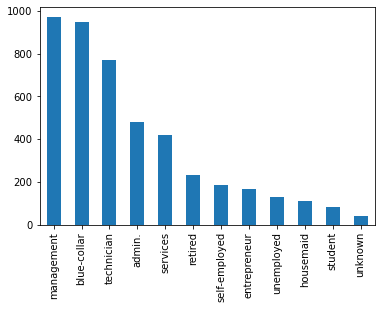

In [10]:
data["job"].value_counts().plot(kind ="bar")

In [11]:
data[(data.job=="unknown")].shape

(38, 17)

<AxesSubplot:>

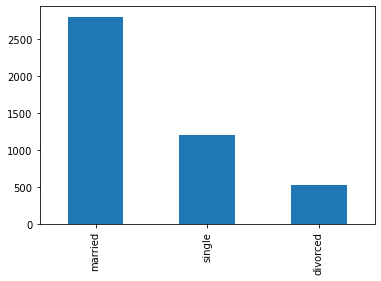

In [12]:
data["marital"].value_counts().plot(kind ="bar")

<AxesSubplot:>

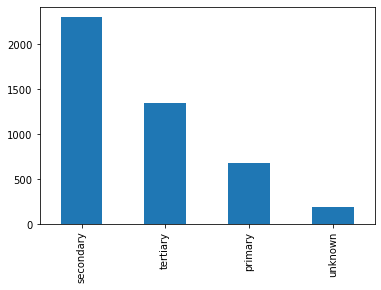

In [13]:
data["education"].value_counts().plot(kind ="bar")

In [14]:
data[(data.education=="unknown")].shape

(187, 17)

<AxesSubplot:>

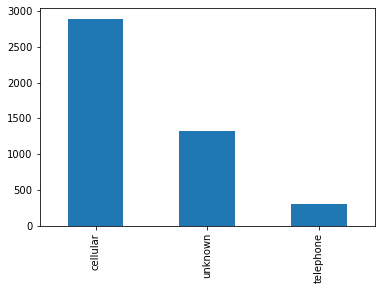

In [15]:
data["contact"].value_counts().plot(kind ="bar")

In [16]:
data[(data.contact=="unknown")].shape

(1324, 17)

<AxesSubplot:>

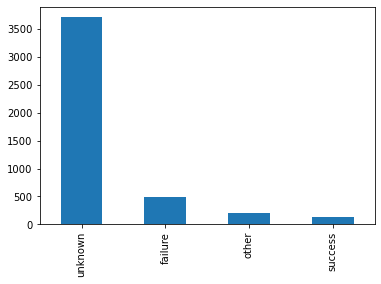

In [17]:
data["poutcome"].value_counts().plot(kind ="bar")
# poutcome column has over 3,500 unknown variables

In [18]:
data[(data.poutcome=="unknown")].shape

(3705, 17)

# Solution - Dataset Description

* The description of the dataset:
    * what is the source of the data?
      Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012.
      
      Data can be found at 
      [pdf] http://hdl.handle.net/1822/14838
      [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
      
    * how many rows and columns?
    
      It has - 4521 Rows & 17 Columns.
      
    * does it have missing values?
    
      There are no missing values.
      
    * any other significant details?
    
        Yes 
        a) the dataset has a large percentage of "unknowns" values in the "poutcome" & "contact" column
        while "job" and "education" column has lower percentage of "unknowns" values.
        
        b) all columns datatypes are objects.

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [ ]:
df.columns

In [19]:
# change objects data types to int
# call a variable and pass the dataframe into it
dfobj = pd.DataFrame(data)
 
#     Create a list of the columns you intend to change
df_col_type = {"age": np.int64,
               "day": np.int64,
               "balance": np.int64,
               "duration": np.int64,
               "campaign": np.int64,
               "pdays": np.int64,
               "previous": np.int64
               }
   
dfobj = dfobj.astype(df_col_type)
df = dfobj
# print("dataframe str to int:\n",df)
 
print(f"\n{df.dtypes}")


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [20]:
#data cleasning cells
# drop rows with unknown values in the job column

df.drop(df[(df["job"] == "unknown")].index, inplace=True) 
# check code
print (df.shape)
df[(df.job=="unknown")]

(4483, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [21]:
df.drop(df[(df["education"] == "unknown")].index, inplace=True) 
# check code
print (df.shape)
df[(df.education=="unknown")]

(4311, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Solution - Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records


Answer

    1. We replaced data types of some columns from objects to string  
    ("age", "day", "balance","duration","campaign","pdays","previous")
    
    2. We removed "unknown" values from both job and education column. Its an unnecessary record.
    
    3. Now we have 4311 rows and 17 columns.
    

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

Text(0.5, 1.0, 'Age Plot')

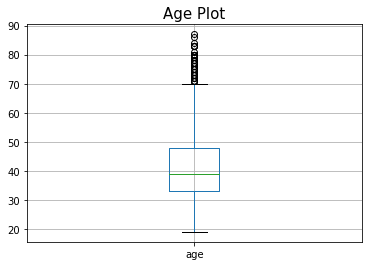

In [22]:
# Create a visual for the age distribution in the dataset
df[["age"]].boxplot()
plt.title("Age Plot",fontsize= 15) #specification for Plot Title

# The box plot above shows that 

    1. The minimum age is 19 
    
    2. With the largest group beign customers age 33 to 48
    
    3. Maximum age is 80+

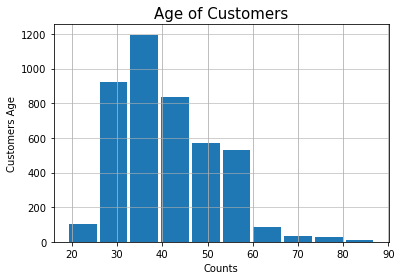

In [23]:
# an histogram plot to show distribution
# to give us a visuals of age distribution of customers
agehist = df.age
# agehist.describe()
# agehist
agehist.plot.hist(grid=True, bins=10, rwidth=0.9)
plt.title("Age of Customers",fontsize= 15) #specification for Plot Title
plt.xlabel("Counts")
plt.ylabel("Customers Age")
plt.grid(axis="y", alpha=0.75)

# The plot above shows that 

    1. the largest age group in our data set is between 33 - 39
    
    2. the least represented are age =>66

In [24]:
educ_label = df.education.unique()
educ_label

array(['primary', 'secondary', 'tertiary'], dtype=object)

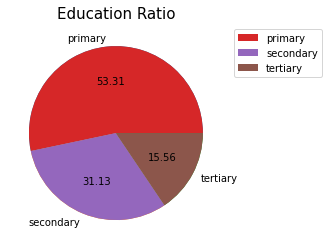

In [25]:
# a pie plot 
educ = df["education"].value_counts(normalize=False)

plt.pie(educ)

plt.pie(x=(educ), labels=(["primary", "secondary", "tertiary"]), autopct="%.2f")

plt.title("Education Ratio", fontsize= 15) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left') #specify legend position
# plt.show()

# The Pie plot above shows that 

    1. The education ratio of customers 
    
    2. With the largest group beign customers with Primary Education
    
    3. And the least represented are customers with Tertiary Education

Text(0.5, 1.0, 'YES & NO Count')

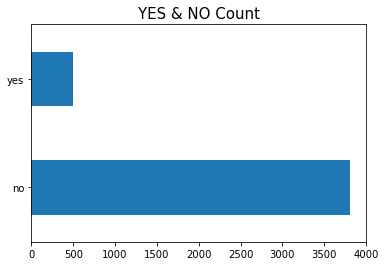

In [26]:
# Show the Ratio of people who said Yes to the bank Campaign.
df["y"].value_counts().plot.barh()
plt.title("YES & NO Count", fontsize= 15) #specification for Plot Title

Text(0.5, 1.0, 'Job Classes')

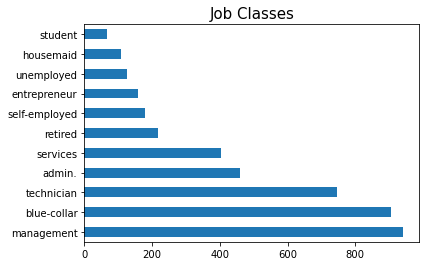

In [27]:
# create a Plot that shows the representation of each Job category. 
df["job"].value_counts().plot.barh()
plt.title("Job Classes", fontsize= 15) #specification for Plot Title

### The plot above shows that 
1. the least represented job type is Student. Whic is understandable many Students may not have savings account
2. While the most represented is the Management cadre

# Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

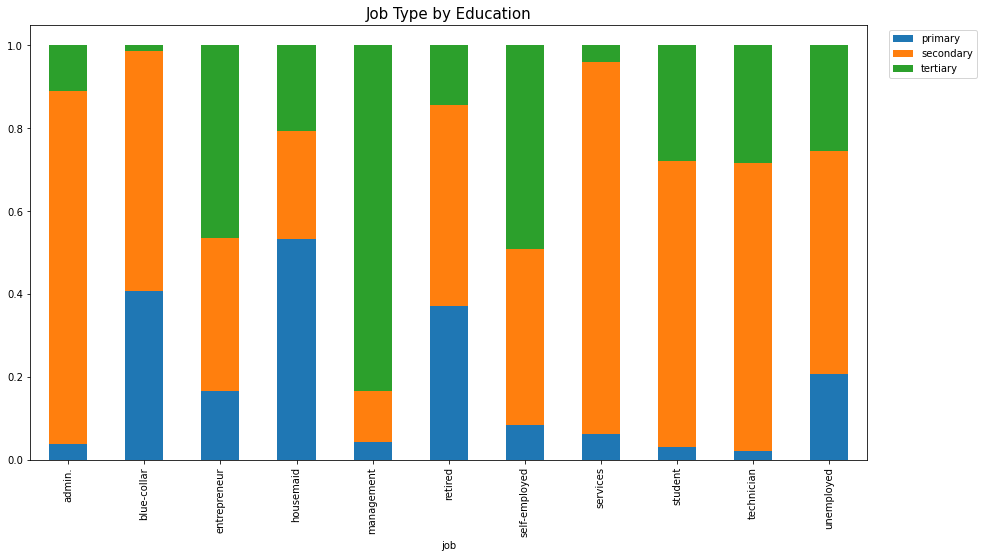

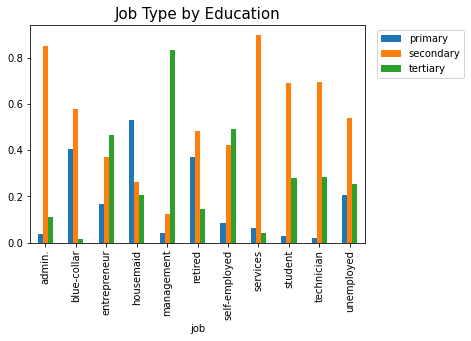

In [28]:
#bivariate analysis cells
#create pivot of job and education
educ_job_pivot = pd.crosstab(df.job,df.education,normalize="index")

#plot the data
educ_job_pivot.plot.bar(stacked=True, figsize=(15,8))
plt.title("Job Type by Education", fontsize= 15) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left') #specify legend position
educ_job_pivot.plot.bar()

plt.title("Job Type by Education", fontsize= 15) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left') #specify legend position
plt.show()

### The plot above shows that 

1. the least represented job type is Student. Whic is understandable many Students may not have savings account
2. While the most represented is the Management cadre

# Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

Text(0.5, 1.0, 'Bank Data Correlations')

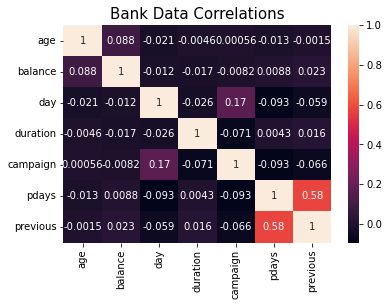

In [29]:
#multivariate analysis cells
plt.figure()
sns.heatmap(df.corr(),annot=True)

plt.title("Bank Data Correlations", fontsize= 15) #specification for Plot Title


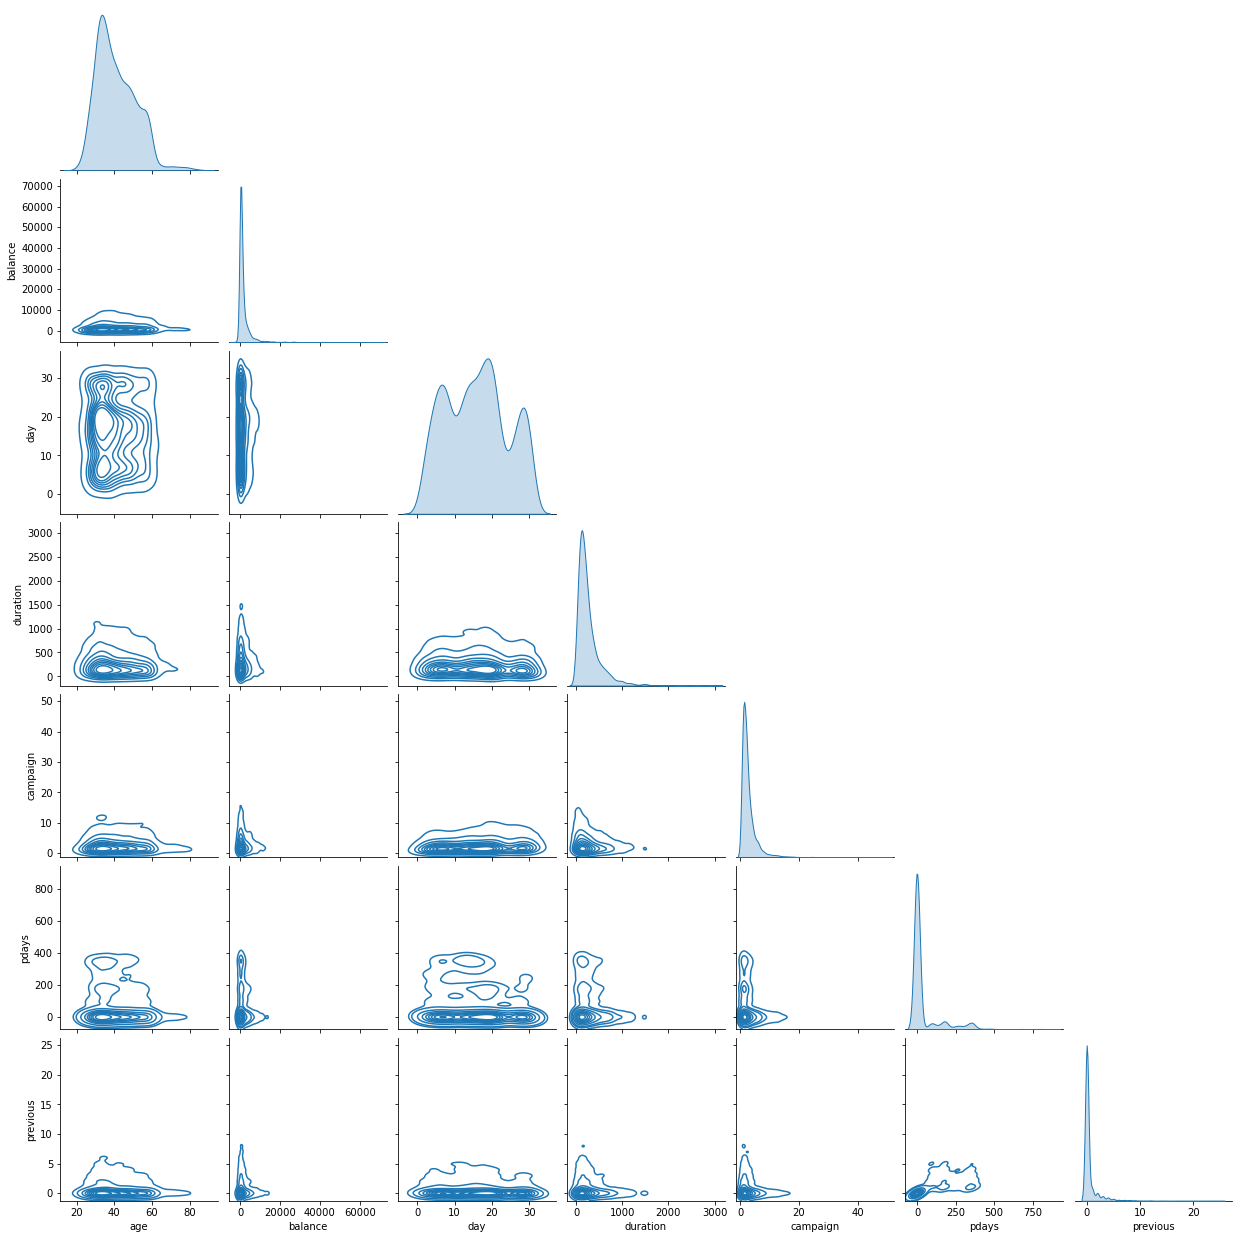

In [30]:
sns.pairplot(df, kind = "kde", corner = True)

# Summary of Findings

In this markdown cell, summarize your list of findings.

1. 
2. 
3. 
4. The dataset has very little correlations

# Modelling

In this section, you will train and evaluate your models


# Feature Engineering

## One-Hot Encording 

it convert categorical data into numerical.

Each value of a column is pivoted into a column of it"s own. The values in this new column will be either 1 or 0 to show whether that value exists or not.

In [35]:
cat = [ "job", "marital", "education", "default",  "housing",
       "loan", "contact", "month", "poutcome"]

In [36]:
catdammy = pd.get_dummies(df[cat])
print(catdammy.shape)
catdammy.head()

(4311, 42)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
# CONCAT OUR DUMMIES WITH ORIGINAL DF
df2=pd.concat([df,catdammy],axis=1)
print(df2.shape)
df2.head(3)

(4311, 59)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [39]:
# drop all ORIGINAL columns one-hot encoded 
df3= df2.drop([ "job", "marital", "education", "default",  "housing",
       "loan", "contact", "month", "poutcome"],axis=1)
print(df3.shape)
df3.head()

(4311, 50)


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,no,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
5,59,0,5,226,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1


## Select Target

In [40]:
# y is our desired target 
y = df3.y
y.head(3)

1    no
2    no
3    no
Name: y, dtype: object

## Select Features

In [41]:
# Select feature columns
featColumn = df3.drop(["y"],axis=1)
print (featColumn.columns)
featColumn.head(4)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [42]:
x = featColumn
x.head(4)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# Train and Test the models

## Import ML algorithms and initialize them



In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Train Test Split

In [45]:
#split into training and validation sets using a 50% split ratio
x_train,x_valid,y_train,y_valid = train_test_split(x,y, test_size=0.5, random_state = 42)

In [46]:
print(("x_train: ",x_train.shape), ("x_valid: ",x_valid.shape),
     ("y_train: ",y_train.shape), ("y_valid: ",y_valid.shape))

('x_train: ', (2155, 49)) ('x_valid: ', (2156, 49)) ('y_train: ', (2155,)) ('y_valid: ', (2156,))


In [60]:
print(x_train.head(2),
      
#       x_valid.head(2),
      
#       y_train.head(2),
      
      y_valid.head(2))

      age  balance  day  duration  campaign  pdays  previous  job_admin.  \
1755   29     1445   26       328         2    143         2           0   
1232   37      490    2        73         1     -1         0           0   

      job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
1755                0                 0  ...          0          0          0   
1232                0                 0  ...          0          0          0   

      month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
1755          0          0          0                 0               0   
1232          0          0          0                 0               0   

      poutcome_success  poutcome_unknown  
1755                 1                 0  
1232                 0                 1  

[2 rows x 49 columns] 2907    no
1827    no
Name: y, dtype: object


In [61]:
# logistic regression
LR = LogisticRegression()

# k neighbors
KN = KNeighborsClassifier()

# decision tree
DC = DecisionTreeClassifier()

# random forest
RF = RandomForestClassifier()

In [62]:
#create list of your model names
models = [LR,KN,DC,RF]

In [63]:
## Train and Test the models
#  create function to train a model and evaluate accuracy
def trainer(model,x_train,y_train,x_valid,y_valid):
    # fit your model
    model.fit(x_train,y_train)
    # predict on the fitted model
    prediction = model.predict(x_valid)
    # print evaluation metric
    print("""
    For {}, Accuracy score is {}
    """.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
#     print(classification_report(prediction,y_valid)) #use this later
    

In [64]:
#loop through each model, training in the process
for model in models:
    trainer(model,x_train,y_train,x_valid,y_valid)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



    For LogisticRegression, Accuracy score is 0.8951762523191095
    

    For KNeighborsClassifier, Accuracy score is 0.8840445269016698
    

    For DecisionTreeClassifier, Accuracy score is 0.8589981447124304
    

    For RandomForestClassifier, Accuracy score is 0.8942486085343229
    


### Inspect Feature Importances

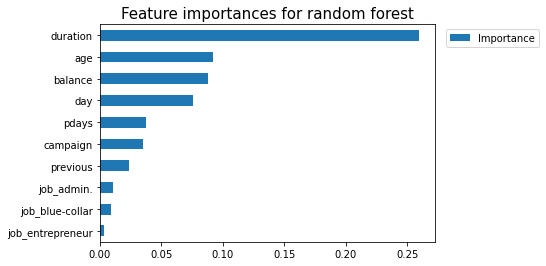

In [65]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = x_valid.columns, columns=["Importance"])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by="Importance").plot.barh()

plt.title("Feature importances for random forest", fontsize= 15) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [66]:
#get these top 10 importances
RF_importances[:10].sort_values(by="Importance").index.values

array(['job_entrepreneur', 'job_blue-collar', 'job_admin.', 'previous',
       'campaign', 'pdays', 'day', 'balance', 'age', 'duration'],
      dtype=object)

### A Bit of Feature Selection

In [67]:
#create a new x train with only 10 features
x_train2 = x_train[["job_entrepreneur", "job_admin.", "job_blue-collar", "previous",
       "pdays", "campaign", "day", "balance", "age", "duration"]]
x_train2.head()

,job_entrepreneur,job_admin.,job_blue-collar,previous,pdays,campaign,day,balance,age,duration
1755,0,0,0,2,143,2,26,1445,29,328
1232,0,0,0,0,-1,1,2,490,37,73
3285,0,1,0,0,-1,2,16,367,57,107
3753,0,0,0,0,-1,1,9,0,47,250
2838,0,0,1,2,122,2,20,699,43,1258


In [68]:
x_valid2 = x_valid[["job_entrepreneur", "job_admin.", "job_blue-collar", "previous",
       "campaign", "pdays", "day", "balance", "age", "duration"]]
x_valid2.head(2)

,job_entrepreneur,job_admin.,job_blue-collar,previous,campaign,pdays,day,balance,age,duration
2907,0,0,0,0,2,-1,21,0,34,191
1827,0,0,0,0,2,-1,5,1819,40,398


In [69]:
#create function to train a model and evaluate accuracy
def trainer(model,x_train2,y_train,x_valid2,y_valid):
    #fit your model
    model.fit(x_train2,y_train)
    #predict on the fitted model
    prediction = model.predict(x_valid2)
    #print evaluation metric
    print("\nFor {}, Accuracy score is {} \n".format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    #print(classification_report(prediction,y_valid)) #use this later

In [70]:
# LOOP THROUUGH EACH MODEL TRAINING IN PROCESS
for model in models:
    trainer(model,x_train2,y_train,x_valid2,y_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.



For LogisticRegression, Accuracy score is 0.8882189239332097 


For KNeighborsClassifier, Accuracy score is 0.8831168831168831 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)



For DecisionTreeClassifier, Accuracy score is 0.5338589981447124 


For RandomForestClassifier, Accuracy score is 0.8840445269016698 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## Evaluating with Cross Validation

In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

This gives you an idea of how the model will perform when it sees new data in the real world that it hasn"t seen before.

In [71]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [72]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,x,y):
    """Cross validation function. Expects a model,"""
    # evaluate model
    scores = cross_val_score(model, x, y, scoring="accuracy", cv=cv, n_jobs=-1)
    # report performance
    print("Accuracy: %.3f" % (mean(scores)))
    

In [73]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,x_train2,y_train)
    

Accuracy: 0.880
Accuracy: 0.876
Accuracy: 0.843
Accuracy: 0.888


## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

In [74]:
from sklearn.metrics import confusion_matrix

# Logistic Regression - Confusion Matrix

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)


clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Text(0.5, 1.0, 'Logistic Regression_Confusion Matrix')

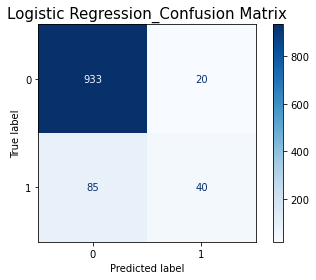

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Logistic Regression_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [77]:
print(cm)

[[933  20]
 [ 85  40]]


# K-Neighbors - Confusion Matrix

In [78]:
KN_CM = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
KN_CM.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Text(0.5, 1.0, 'KNeighbors_Confusion Matrix')

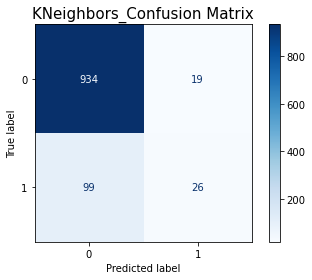

In [79]:

y_pred = KN_CM.predict(x_test)
KCM = confusion_matrix(y_test, y_pred)

kcm_display = ConfusionMatrixDisplay(KCM).plot(cmap="Blues")
plt.title("KNeighbors_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [80]:
print(KCM)

[[934  19]
 [ 99  26]]


# Decision Tree - Confusion Matrix

In [81]:
DT_CM = make_pipeline(StandardScaler(), DecisionTreeClassifier(splitter='best'))
DT_CM.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Text(0.5, 1.0, 'Decision Tree_Confusion Matrix')

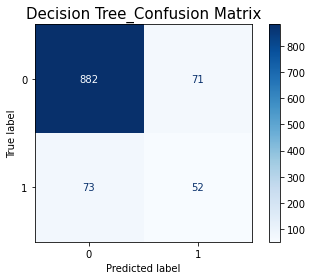

In [82]:
y_pred = DT_CM.predict(x_test)
DTCM = confusion_matrix(y_test, y_pred)

dtcm_display = ConfusionMatrixDisplay(DTCM).plot(cmap="Blues")
plt.title("Decision Tree_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [83]:
print(DTCM)

[[882  71]
 [ 73  52]]


# Random Forest - Confusion Matrix

In [84]:
RF_CM = make_pipeline(StandardScaler(), RandomForestClassifier(max_features='auto'))
RF_CM.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

Text(0.5, 1.0, 'Random Forest_Confusion Matrix')

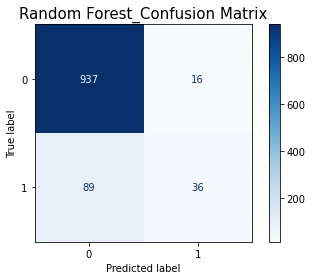

In [85]:

y_pred = RF_CM.predict(x_test)
RFCM = confusion_matrix(y_test, y_pred)

rfcm_display = ConfusionMatrixDisplay(RFCM).plot(cmap="Blues")
plt.title("Random Forest_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [86]:
print(RFCM)

[[937  16]
 [ 89  36]]


## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

**We used 4 ML Algorithms**

    a. Logistic Regression
    b. KNeighbors
    c. Decision Tree
    d. Random Forest

**Confusion Matrix for Logistic Regression**

    With a Our test size at 50%
    Our result:
            [[925  28]
            [ 87  38]]

    Shows that our model predicts the "No" at 91.40%
    better than the "Yes" at 57.57%


**Confusion Matrix for K-Neighbors**

    With a Our test size at 50%
    Our result:
            [[931  22]
             [ 99  26]]

    Shows that our model predicts the "No" at 90.38% Correctly
    better than the "Yes" at 54.16% 

**Confusion Matrix for Decision Tree**

    With a Our test size at 50%
    Our result:
            [[893  60]
             [ 74  51]]

    Shows that our model predicts the "No" at 92.34% Correctly
    better than the "Yes" at 45.94% 
    
**Confusion Matrix for Random Forest**

    With a Our test size at 50%
    Our result:
            [[938  15]
             [ 91  34]]

    Shows that our model predicts the "No" at 91.11% Correctly
    better than the "Yes" at 69.38% 
    
We feel this is beacuse our data set has
        3813 of NO and 498 of YES
       
So it performs better with more data

## Interpret Results

Random Forest performed best in predicting if Customer **would/would not** accept to subscribed to the product (bank term deposit).

## Summary

What model should be deployed to production?
Any other comments?

    1. Random Forrest Model Algorithm to be deployed. 

In [87]:
(3813+498) *.5

2155.5

In [88]:
2155.5*.5

1077.75

In [89]:
925 + 87 + 28 + 38

1078

In [90]:
931+99+22+26

1078

In [91]:
893 + 60 + 74 + 51

1078

In [92]:
938 + 15 + 91 + 34

1078